# 1. Importing Libraries

In [464]:
import numpy as np 
import csv
import pandas as pd 
pd.set_option("display.max_rows",None) 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
print(sklearn.__version__)
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

1.4.2


# 2. Importing Dataset

In [465]:
df = pd.read_csv("heart.csv")
df.head(10)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
6              N      0.0       Up             0  
7              N      0.0       Up             0  
8              Y      1.5     Flat             1  
9              N      0.0       Up             0

# 3. Dataset Description

df.info() #short info of the dataframe
df.size #no of elements in dataframe =rows*column (m*n)


In [466]:
df.shape #print no of rows and columns

(923, 12)

In [467]:
def dataset_description(df):
    columns=df.columns.to_list()
    print('No. of Columns in DataFrame: ',len(columns))
    print('\nColumn attribute Names: ',columns)
    ncol=df.describe().columns.to_list()
    ccol=[]
    for i in columns:
        if(ncol.count(i)==0):
            ccol.append(i)
        else:
            continue
    print('\nNo. of Numerical Column in DataFrame: ',len(ncol))
    print('\nNumerical Column Names: ',ncol)
    print('\nNo. of Categorical Column in DataFrame: ',len(ccol))
    print('\nCategorical Column Names: ',ccol)

dataset_description(df)


No. of Columns in DataFrame:  12

Column attribute Names:  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

No. of Numerical Column in DataFrame:  7

Numerical Column Names:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

No. of Categorical Column in DataFrame:  5

Categorical Column Names:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [468]:
df.isnull().sum() #checking the null values present in the DataFrame


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [469]:
df.nunique() #number of unique values found in the DataFrame of each column


Age                50
Sex                 2
ChestPainType       5
RestingBP          68
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             120
ExerciseAngina      2
Oldpeak            54
ST_Slope            3
HeartDisease        2
dtype: int64

In [470]:
df.describe().T #printing statistics


count        mean         std   min    25%    50%    75%    max
Age           923.0   53.464789    9.442807  28.0   47.0   54.0   60.0   77.0
RestingBP     923.0  132.407367   18.556382   0.0  120.0  130.0  140.0  200.0
Cholesterol   923.0  198.978332  109.163898   0.0  173.5  223.0  267.0  603.0
FastingBS     923.0    0.234020    0.423614   0.0    0.0    0.0    0.0    1.0
MaxHR         923.0  136.911159   25.588618  60.0  120.0  138.0  156.0  202.0
Oldpeak       923.0    0.894475    1.082558  -2.6    0.0    0.6    1.5    6.2
HeartDisease  923.0    0.552546    0.497501   0.0    0.0    1.0    1.0    1.0

In [471]:
# Convert categorical variables to numeric using one-hot encoding
df_numeric = pd.get_dummies(df)

corr_matrix = df_numeric.corr()  #tells corelation between columns of dataframe
print(corr_matrix)

                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.256308    -0.097555   0.197285 -0.386078   
RestingBP          0.256308   1.000000     0.098765   0.070921 -0.119774   
Cholesterol       -0.097555   0.098765     1.000000  -0.260067  0.237979   
FastingBS          0.197285   0.070921    -0.260067   1.000000 -0.130457   
MaxHR             -0.386078  -0.119774     0.237979  -0.130457  1.000000   
Oldpeak            0.244059   0.150953     0.050795   0.060294 -0.147074   
HeartDisease       0.283965   0.107527    -0.233238   0.270959 -0.399211   
Sex_F             -0.058954  -0.006788     0.199431  -0.123080  0.189221   
Sex_M              0.058954   0.006788    -0.199431   0.123080 -0.189221   
ChestPainType_ASY  0.168945   0.052170    -0.122588   0.130703 -0.359582   
ChestPainType_ATA -0.218332  -0.044939     0.151920  -0.142101  0.252956   
ChestPainType_NAP -0.008689  -0.041421    -0.007494  -0.040194  0.131326   
ChestPainTyp

In [472]:
# Calculate skewness only for numeric data
numeric_data = df.select_dtypes(include=[np.number])
skewness = numeric_data.skew()
print(skewness)

Age            -0.189037
RestingBP       0.185200
Cholesterol    -0.614511
FastingBS       1.258495
MaxHR          -0.135617
Oldpeak         1.092291
HeartDisease   -0.211699
dtype: float64


# 4. Data Visualization

In [473]:
# print(plt.style.available)

In [474]:
plt.figure(figsize=(18,18))
plt.subplot(3,2,1)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Age', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Age vs HeartDisease')

plt.subplot(3,2,2)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='RestingBP', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('RestingBP vs HeartDisease')

plt.subplot(3,2,3)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Cholesterol', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Cholesterol vs HeartDisease')

plt.subplot(3,2,4)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='FastingBS', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('FastingBS vs HeartDisease')

plt.subplot(3,2,5)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='MaxHR', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('MaxHR vs HeartDisease')

plt.subplot(3,2,6)
plt.style.use('Solarize_Light2')
plt.tight_layout()
sns.set_context('talk')
sns.histplot(data=df, x='Oldpeak', hue="HeartDisease",multiple="stack",palette='magma')
plt.title('Oldpeak vs HeartDisease')
plt.show()

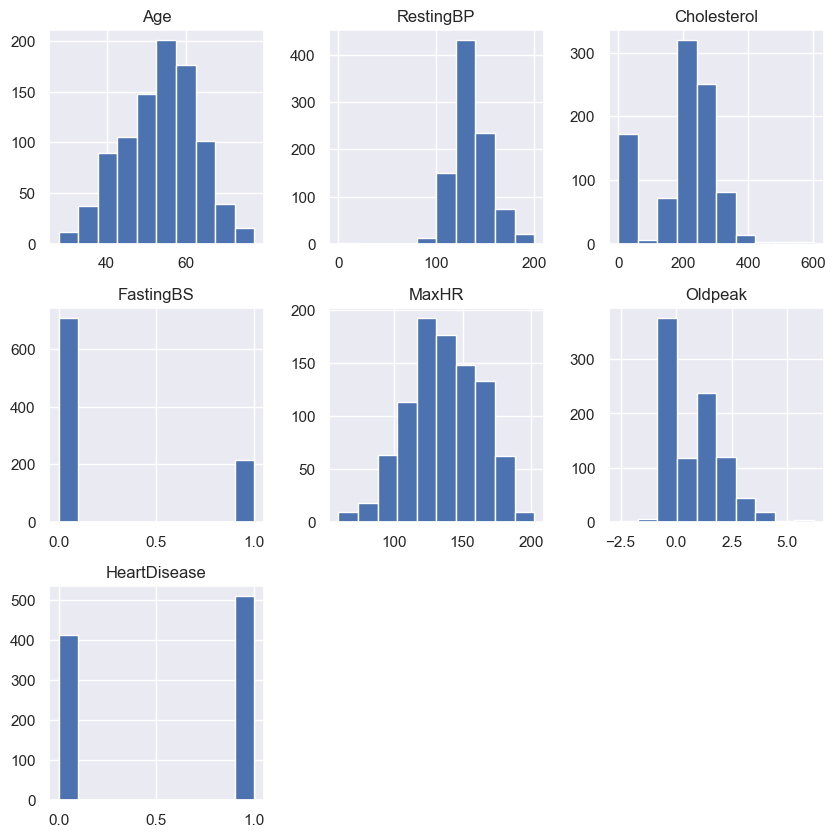

In [475]:
#g = sns.FacetGrid(tips, col="time")
#g.map(sns.histplot, "tip")
sns.set()
df.hist(figsize=(10,10))
plt.show()

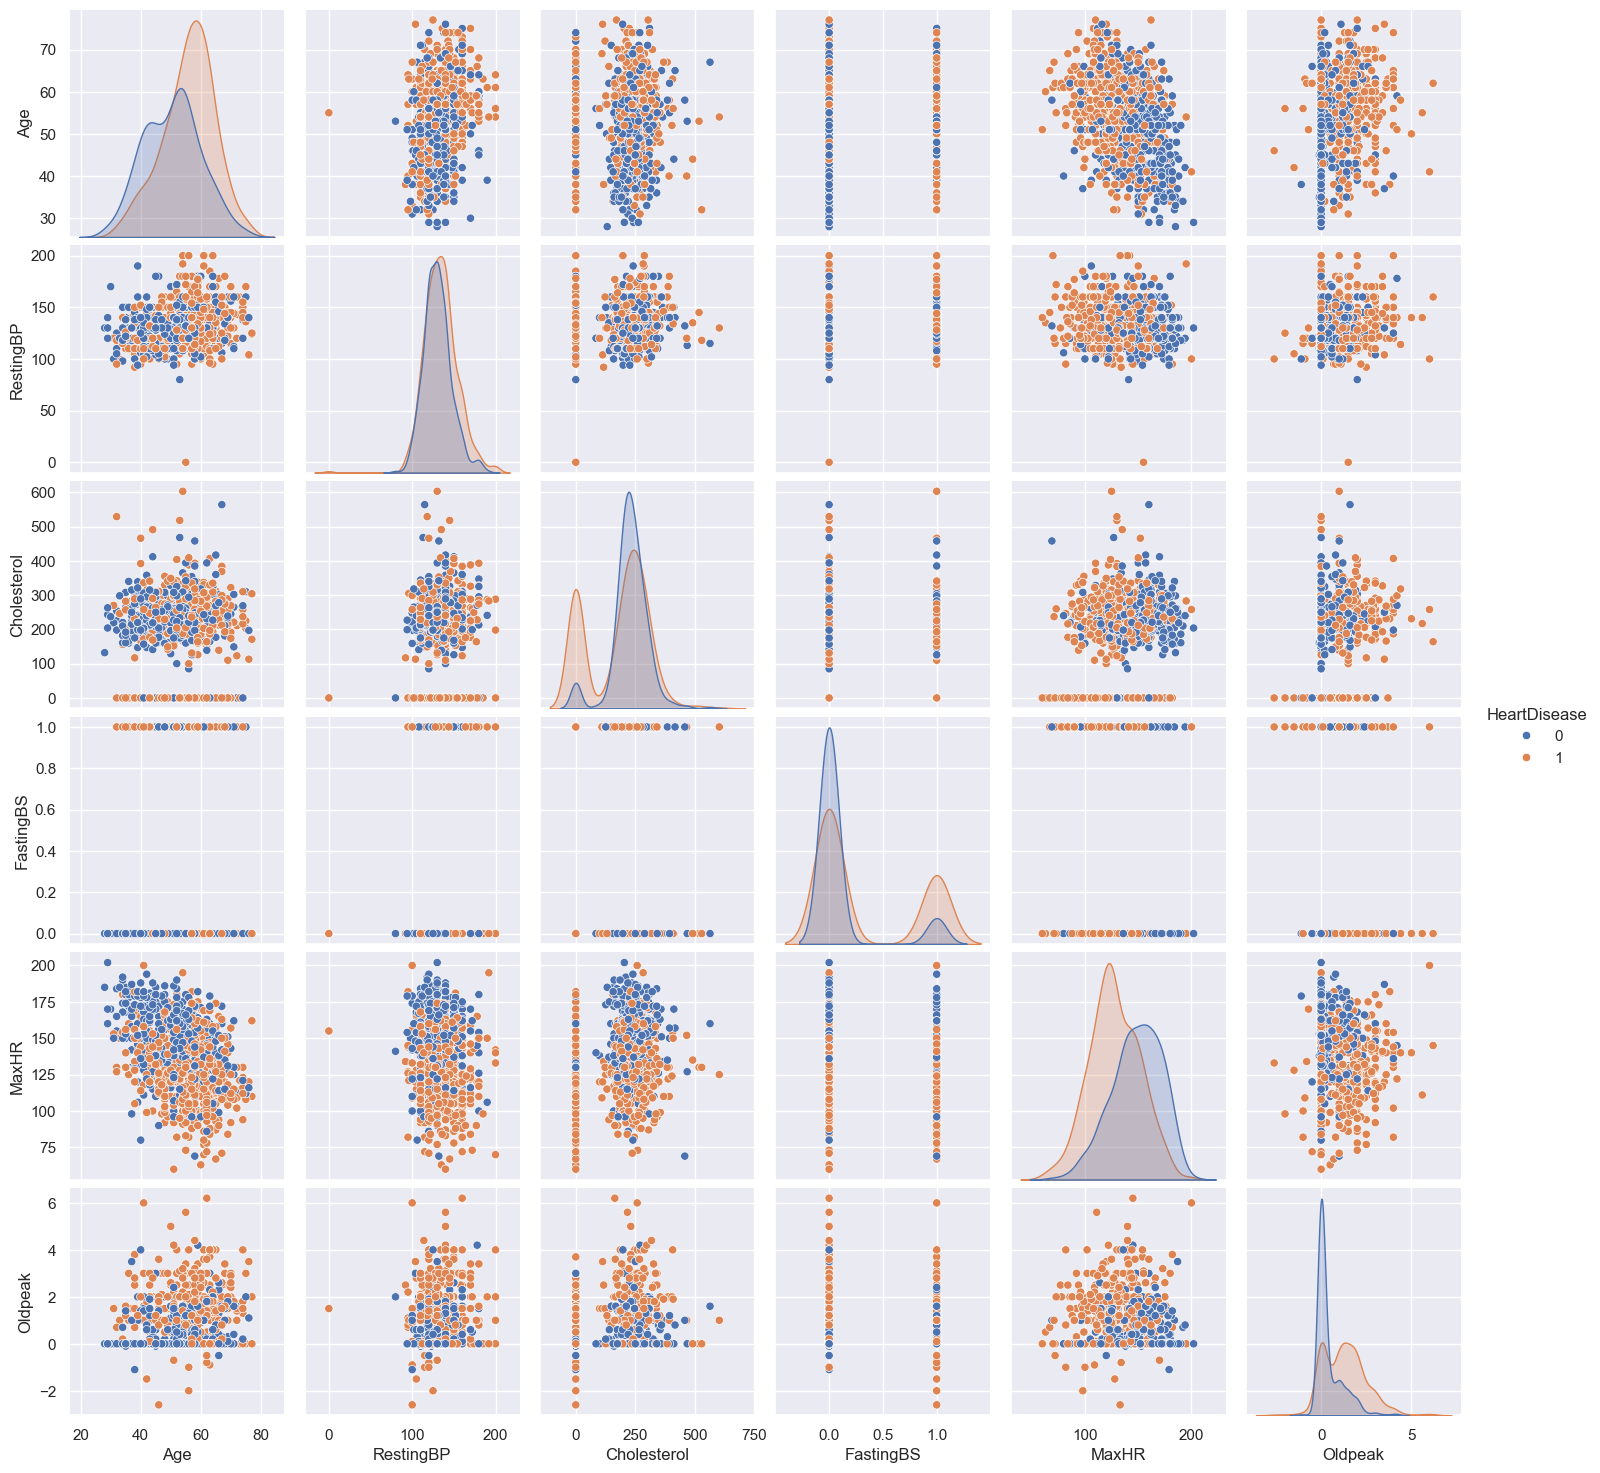

In [476]:
#sns.pairplot(df,hue='HeartDisease')

df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Now use seaborn's pairplot
g = sns.pairplot(df, hue='HeartDisease')
plt.show()


In [477]:
df1= df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df1
# average age is same for both male and female

Age  ChestPainType   RestingBP  Cholesterol  FastingBS  RestingECG  \
Sex                                                                             
F    52.389744            195  132.164103   241.020513         26         195   
M    53.752747            728  132.472527   187.717033        190         728   

          MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
Sex                                                                
F    146.261538             195  0.682564       195            50  
M    134.406593             728  0.951236       728           460

In [478]:
import plotly.express as px
px.bar(data_frame=df1, barmode='group', title = "Gender wise Analyzing",template="plotly_dark")

# 5. Data Preprocessing

In [479]:
def outliers_graph(df_column):
    Q75, Q25 = np.percentile(df_column, [75 ,25])
    IQR = Q75 - Q25
    print('Q25: ',Q25)
    print('Q75: ',Q75)
    print('Inter Quartile Range: ',IQR)
    print('Outliers lie before', Q25-1.5*IQR, 'and beyond', Q75+1.5*IQR)
    print('Number of Rows with Left Extreme Outliers:', len(df[df_column <Q25-1.5*IQR]))
    print('Number of Rows with Right Extreme Outliers:', len(df[df_column>Q75+1.5*IQR]))

In [480]:
outliers_graph(df['Age'])

Q25:  47.0
Q75:  60.0
Inter Quartile Range:  13.0
Outliers lie before 27.5 and beyond 79.5
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 0


In [481]:
outliers_graph(df['RestingBP'])


Q25:  120.0
Q75:  140.0
Inter Quartile Range:  20.0
Outliers lie before 90.0 and beyond 170.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 27


In [482]:
df=df[df.RestingBP>=90]
len(df)

921

In [483]:
outliers_graph(df['Cholesterol'])

Q25:  175.0
Q75:  267.0
Inter Quartile Range:  92.0
Outliers lie before 37.0 and beyond 405.0
Number of Rows with Left Extreme Outliers: 170
Number of Rows with Right Extreme Outliers: 12


In [484]:
df=df[df.Cholesterol<=450]  #due more value in the right extreme outlier and '0' cholesterol level in dataset
len(df)


913

In [485]:
outliers_graph(df['FastingBS'])

Q25:  0.0
Q75:  0.0
Inter Quartile Range:  0.0
Outliers lie before 0.0 and beyond 0.0
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 213


In [486]:
outliers_graph(df['MaxHR'])



Q25:  120.0
Q75:  156.0
Inter Quartile Range:  36.0
Outliers lie before 66.0 and beyond 210.0
Number of Rows with Left Extreme Outliers: 2
Number of Rows with Right Extreme Outliers: 0


In [487]:
df=df[df.MaxHR>=70]
len(df)

910

In [488]:
outliers_graph(df['Oldpeak'])

Q25:  0.0
Q75:  1.5
Inter Quartile Range:  1.5
Outliers lie before -2.25 and beyond 3.75
Number of Rows with Left Extreme Outliers: 1
Number of Rows with Right Extreme Outliers: 17


In [489]:
print('Mean: ',df['Cholesterol'].mean())
print('Median: ',df['Cholesterol'].median())

Mean:  197.3186813186813
Median:  222.5


In [490]:
mc=df[df['Cholesterol']>0].Cholesterol.mean() #mean value of Cholesterol without including the cholesterol=0
print('Mean of Cholesterol>0: ',mc)

Mean of Cholesterol>0:  241.66890982503364


In [491]:
df.describe().T

count        mean         std   min    25%    50%    75%    max
Age           910.0   53.475824    9.445051  28.0   47.0   54.0   60.0   77.0
RestingBP     910.0  132.641758   18.036670  92.0  120.0  130.0  140.0  200.0
Cholesterol   910.0  197.318681  104.799959   0.0  175.0  222.5  266.0  417.0
FastingBS     910.0    0.232967    0.422954   0.0    0.0    0.0    0.0    1.0
MaxHR         910.0  137.203297   25.288335  70.0  120.0  138.0  156.0  202.0
Oldpeak       910.0    0.897033    1.087079  -2.6    0.0    0.6    1.5    6.2
HeartDisease  910.0    0.550549    0.497712   0.0    0.0    1.0    1.0    1.0

## 5.1. One Hot Encoding

In [492]:
def OneHotEncoding(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True)
  if(finallencol==len(df.columns)):
    print('OneHotEncoding is sucessfull')
    print('')
  else:
    print('Unsucessfull')
  return df.head(5)


In [493]:
OneHotEncoding(df['ChestPainType'])
OneHotEncoding(df['Sex'])
OneHotEncoding(df['RestingECG'])
OneHotEncoding(df['ExerciseAngina'])
OneHotEncoding(df['ST_Slope'])

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull

OneHotEncoding is sucessfull



Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_NSP  ChestPainType_TA  \
0               True              False              False             False   
1              False               True              False             False   
2               True              False              False             False   
3              False              False              False             False   
4              False               True              False             False   

   Sex_M  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0   True               True          False             False          False   
1  False               True          False             False           True   
2   True              False           True             False          False   
3  False               True          False              True           True   
4   True               True          False             False          False   

   ST_Slope_Up  
0         True  
1        False  
2         True  
3        False  
4         True

In [494]:
def preprocess_input(new_data):
    # Column names from your X_train
    columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
               'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'Sex_M',
               'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y',
               'ST_Slope_Flat', 'ST_Slope_Up']

    # Initialize a dictionary to hold the processed form of the input data
    processed_data = {col: 0 for col in columns}  # start with zeros

    # Manually set the values based on the input
    processed_data['Age'] = new_data['Age']
    processed_data['RestingBP'] = new_data['RestingBP']
    processed_data['Cholesterol'] = new_data['Cholesterol']
    processed_data['FastingBS'] = new_data['FastingBS']
    processed_data['MaxHR'] = new_data['MaxHR']
    processed_data['Oldpeak'] = new_data['Oldpeak']

    # One-hot encode categorical data manually
    processed_data[f'ChestPainType_{new_data["ChestPainType"]}'] = 1
    processed_data['Sex_M'] = 1 if new_data['Sex'] == 'M' else 0
    processed_data[f'RestingECG_{new_data["RestingECG"]}'] = 1
    processed_data['ExerciseAngina_Y'] = 1 if new_data['ExerciseAngina'] == 'Y' else 0
    processed_data[f'ST_Slope_{new_data["ST_Slope"]}'] = 1

    # Convert the dictionary to a DataFrame
    new_data_df = pd.DataFrame([processed_data], columns=columns)

    return new_data_df


In [495]:
df.describe().columns.to_list()

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

## 5.2. Imputation

In [496]:
print(df.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_NSP', 'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [497]:
#Zero value of cholesterol are filled usnig KNNImputer
from sklearn.impute import KNNImputer
df['Cholesterol'].replace(to_replace = 0, value =np.nan, inplace=True)
KNN_imputed = KNNImputer(n_neighbors=5)
I=KNN_imputed.fit_transform(df)
Cholesterol=[]
for i in range(0,len(df)):
  Cholesterol.append(I[i][2])
df['Cholesterol']=Cholesterol

C:\Users\fasal\AppData\Local\Temp\ipykernel_11200\2021826734.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [498]:
print(df.columns)


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_NSP', 'ChestPainType_TA', 'Sex_M', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


# 6. Feature Scaling

In [499]:
# altering the DataFrame
df = df[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'Sex_M',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_Y',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'HeartDisease',]]

# printing the altered DataFrame
df.head(5)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ChestPainType_ATA  \
0   40        140        289.0          0    172      0.0               True   
1   49        160        180.0          0    156      1.0              False   
2   37        130        283.0          0     98      0.0               True   
3   48        138        214.0          0    108      1.5              False   
4   54        150        195.0          0    122      0.0              False   

   ChestPainType_NAP  ChestPainType_TA  Sex_M  RestingECG_Normal  \
0              False             False   True               True   
1               True             False  False               True   
2              False             False   True              False   
3              False             False  False               True   
4               True             False   True               True   

   RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0          False             False          False         True             0  
1          False             False           True        False             1  
2           True             False          False         True             0  
3          False              True           True        False             1  
4          False             False          False         True             0

In [500]:
scaler = StandardScaler()
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [501]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.427545   0.408184     0.983653  -0.551112  1.376755 -0.825631   
1 -0.474141   1.517646    -1.276061  -0.551112  0.743704  0.094771   
2 -1.745346  -0.146547     0.859265  -0.551112 -1.551105 -0.825631   
3 -0.580075   0.297238    -0.571196  -0.551112 -1.155448  0.554972   
4  0.055528   0.962915    -0.965091  -0.551112 -0.601529 -0.825631   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA     Sex_M  \
0           2.064005          -0.530745         -0.233369  0.518823   
1          -0.484495           1.884144         -0.233369 -1.927440   
2           2.064005          -0.530745         -0.233369  0.518823   
3          -0.484495          -0.530745         -0.233369 -1.927440   
4          -0.484495           1.884144         -0.233369  0.518823   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0           0.818367      -0.491399         -0.823994      -0.993428   
1           0.818367      -0.491399         -0.823994       1.006615   
2          -1.221945       2.035004         -0.823994      -0.993428   
3           0.818367      -0.491399          1.213600       1.006615   
4           0.818367      -0.491399         -0.823994      -0.993428   

   ST_Slope_Up  
0     1.136746  
1    -0.879704  
2     1.136746  
3    -0.879704  
4     1.136746

# 7. Featured Selection

In [502]:
col=df.describe().columns.to_list()
print(col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [503]:
X = df_feat
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# 8. Predicting Using KNN, Linear Regression, Random Forest


# K value estimation

In [504]:
from matplotlib import pyplot
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print(i,np.mean(pred_i != y_test))

1 0.20614035087719298
2 0.23684210526315788
3 0.15350877192982457
4 0.15789473684210525
5 0.13596491228070176
6 0.13157894736842105
7 0.13596491228070176
8 0.13596491228070176
9 0.11842105263157894
10 0.13157894736842105
11 0.12719298245614036
12 0.13596491228070176
13 0.13596491228070176
14 0.13596491228070176
15 0.13157894736842105
16 0.13596491228070176
17 0.13157894736842105
18 0.13157894736842105
19 0.13157894736842105
20 0.12719298245614036
21 0.13157894736842105
22 0.13157894736842105
23 0.12719298245614036
24 0.14035087719298245
25 0.13157894736842105
26 0.13157894736842105
27 0.12719298245614036
28 0.12280701754385964
29 0.12280701754385964
30 0.12280701754385964
31 0.12280701754385964
32 0.12280701754385964
33 0.12280701754385964
34 0.12280701754385964
35 0.12280701754385964
36 0.12719298245614036
37 0.12280701754385964
38 0.12280701754385964
39 0.12719298245614036


Text(0, 0.5, 'Error Rate')

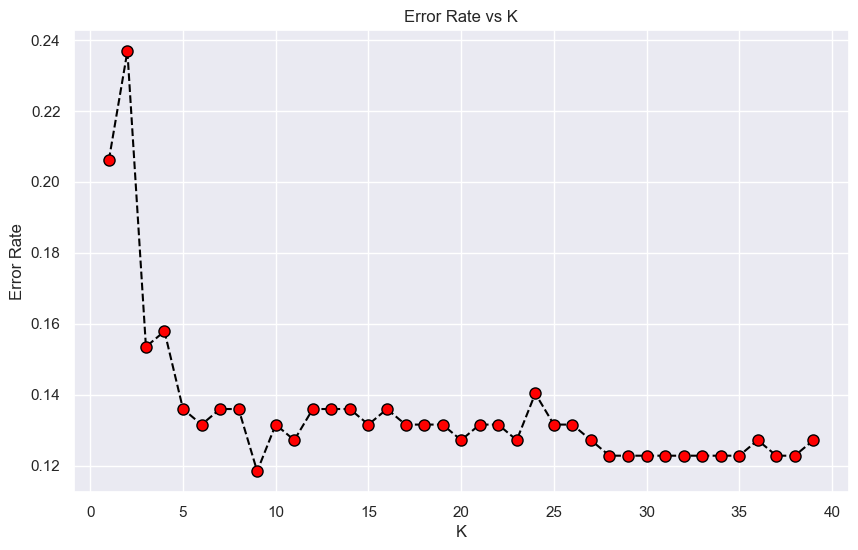

In [505]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'black',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 8)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

# KNN model

In [506]:
from sklearn.impute import KNNImputer

# Assuming that you need to impute missing values in your dataset
# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=36)  # You can adjust the number of neighbors based on your dataset

# Fit the imputer on the training data (X_train)
knn_imputer.fit(X_train)


KNNImputer(n_neighbors=36)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        95
           1       0.89      0.89      0.89       133

    accuracy                           0.87       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228



------------------------
Confusion Matrix
------------------------



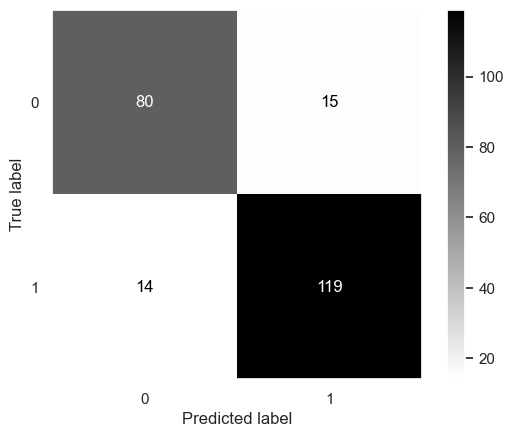

Accuracy of KNN: 0.873
Accuracy of KNN: 0.860 (0.031)


In [507]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score


# Step 1: Initialize and train the classifier
classifier = KNeighborsClassifier(n_neighbors=36)
classifier.fit(X_train, y_train)

# Step 2: Evaluate the classifier with the test data
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="binary")
plt.grid(False)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.3f}")


# Define the number of folds for cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)


scores = cross_val_score(classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [508]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.84      0.85        95
           1       0.89      0.89      0.89       133

    accuracy                           0.87       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228



# Linear Regression

In [509]:
from sklearn.linear_model import LinearRegression



# Step 1: Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 2: Evaluate the model with the test data
y_pred_lr = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Use a threshold to classify predictions
threshold = 0.5  # Example threshold
classified_preds = [1 if x >= threshold else 0 for x in y_pred_lr]

classification_accuracy = accuracy_score(y_test, classified_preds)
print("Classification Accuracy:", classification_accuracy)


Mean Squared Error: 0.1057585091078821
R2 Score: 0.5648792768132851
Classification Accuracy: 0.8640350877192983


# Random Forest Classifier

Accuracy of RandomForest: 0.8640350877192983
              precision    recall  f1-score   support

           0       0.84      0.83      0.84        95
           1       0.88      0.89      0.88       133

    accuracy                           0.86       228
   macro avg       0.86      0.86      0.86       228
weighted avg       0.86      0.86      0.86       228



------------------------
Confusion Matrix
------------------------



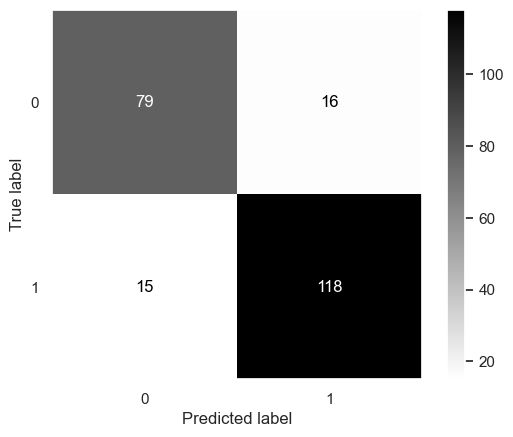

Accuracy of KNN: 0.862 (0.042)


In [510]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Initialize and train the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 2: Evaluate the classifier with the test data
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of RandomForest:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))
print('\n')
print('------------------------')
print('Confusion Matrix')
print('------------------------')
print('')
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap="binary")
plt.grid(False)
plt.show()

scores = cross_val_score(rf_classifier, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of KNN: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

# Making .pkl

In [511]:
import pickle
with open('HDPN.pkl', 'wb') as f:
    pickle.dump({'random_forest': rf_classifier,
                 'knn': classifier, 
                 'linear_regression': linear_model,
                 'scaler': scaler},  
                f)